<a href="https://colab.research.google.com/github/Firizki17/Machine-Learning/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
dataset = pd.read_csv('Social_Network_Ads (1).csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test = sc.transform(X_test)

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix # Correct import
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[68  0]
 [32  0]]


<ipython-input-36-25484f9407f7>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


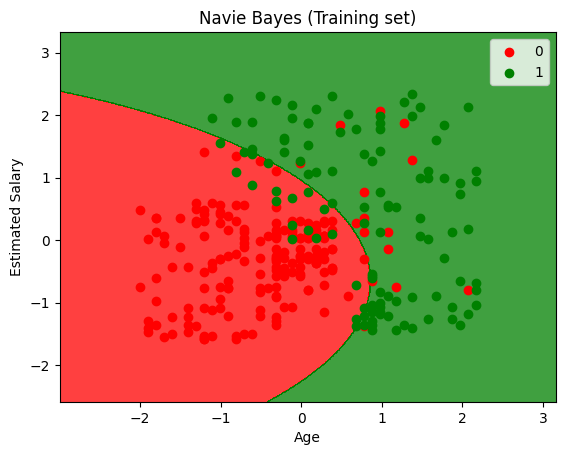

In [36]:
from matplotlib.colors import ListedColormap

x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Navie Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

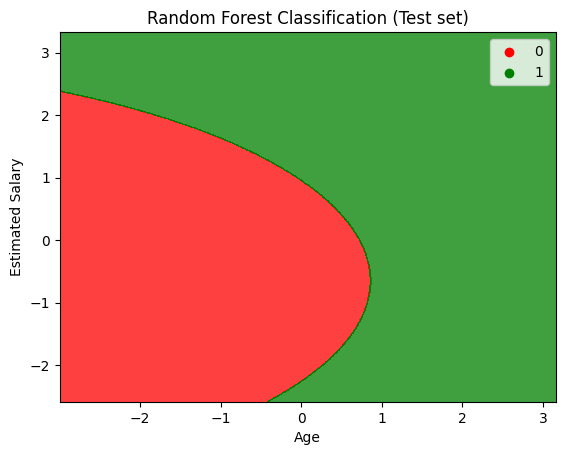

In [41]:
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
    np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
